start_box_coord [3.13, 21.92, 21.84, 3.07]
Graph for visualization of clusters formed: 


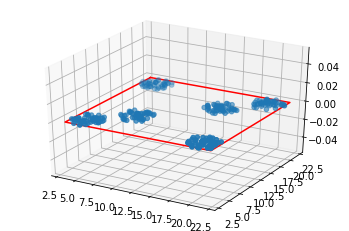

box_start_coord [4.41, 22.33, 22.27, 4.35]
-------------------------------------------------------
{(4.41, 4.35): [[], [(4.41, 5.63), (5.69, 5.63), (5.69, 4.35)], [(-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999)], 0, 0, 0, 0, 0], (4.41, 5.63): [[], [(4.41, 6.91), (3.13, 6.91), (3.13, 5.63), (3.13, 4.35), (4.41, 4.35)], [(-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999)], 1, 0, 0, 0, 0], (4.41, 6.91): [[], [(4.41, 8.19), (3.13, 8.19), (3.13, 6.91), (3.13, 5.63), (4.41, 5.63)], [(-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999)], 1, 0, 0, 0, 0], (4.41, 8.19): [[], [(4.41, 9.47), (3.13, 9.47), (3.13, 8.19), (3.13, 6.91), (4.41, 6.91)], [(-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999), (-999, -999)], 1, 0, 0, 0, 0], (4.41, 9.47): [[], [(4.41, 10.75), (3.13, 10

1st level down level =  (15.93, 14.59)
Calling for Second level for down 
choosing 2nd level box down (15.93, 13.31)
checking for left down 1st  level box 
1st level down left box =  (14.65, 14.59)
checking for left 1st  level box 
1st level left box =  (14.65, 15.87)
Calling for Second level for left
choosing 2nd level box up left  (13.37, 15.87)
checking for up left 1st  level box 
1st level up left box =  (14.65, 17.15)
checking for left 1st  level box 
1st level left box =  (15.93, 17.15)
Calling for Second level for left
choosing 2nd level box up left  (14.65, 17.15)
checking for up left 1st  level box 
1st level up left box =  (15.93, 18.43)
Calling for Second level for top box
checking for top right 1st  level box 
1st level top right level =  (18.49, 17.15)
checking for right 1st  level box 
1st level right level =  (18.49, 15.87)
Calling for Second level for  right
choosing 2nd level box right (19.77, 15.87)
checking for down right 1st  level box 
1st level down right box =  (

In [6]:

import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import math
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import sys
start_time = time.time()
import decimal
import scipy.spatial as spatial
from collections import Counter
import itertools
import sys
sys.setrecursionlimit(1000)
epsilon = 1.8
min_points =  4.0  # float(sys.argv[3])


# points,neighbours,merging distance,position,flag,cluster_id,hot_cold,visited
def supercube_dbscan():
    # Take input from file (Copy Paste from dbscan code) and sort acc. to x and  y axis
    # open the dataset
    file_name = "dataset1.csv"
    i = open(file_name)
    lines = i.read().strip().split('\n')
    i.close()
    # initialize the list in which your dataset will be stored in the form of list
    dataset = {}
    coord = []
    dim_size = 2  # int(sys.argv[1]) #float(sys.argv[2])
    min_points = 4.0  # float(sys.argv[3])
    # Sort
    for i in range(dim_size):
        coord.append([])
    for i in lines:
        line = i.rstrip().split(',')
        temp = []
        # extract x and y coordinates
        for j in line:
            temp.append(j.strip())
        # print temp
        # convert to float if the input is not numeric type
        for i in range(dim_size):
            temp[i] = float(temp[i])
            coord[i].append(round(temp[i],2))
        # can't use list as keys so converting to tuple
        temp = tuple(temp)
        # print len(dataset)
        # default not visited that's why 0
        dataset[temp] = 0
    data = list(sorted(dataset.keys(), key=lambda t: t[0]))
    data = re_round(data)
    #print data
    start_box_coord = []
    start_box_coord.append(round(min(coord[0]), 2))  # left most point in dataset(0)
    start_box_coord.append(round(max(coord[0]), 2))  # right most point in dataset(1)
    start_box_coord.append(round(max(coord[1]), 2))  # top most point in dataset(2)
    start_box_coord.append(round(min(coord[1]), 2))  # bottom most point in dataset(3)
    print("start_box_coord",start_box_coord)
    len_x = round(abs(start_box_coord[1] - start_box_coord[0]), 2)  # total length of x-axis
    len_y = round(abs(start_box_coord[2] - start_box_coord[3]), 2)
    # total length of y-axis
    number_box_x = int(math.ceil(len_x / round((epsilon / 1.41), 2)))  # epsilon/rt(2)=1.27
    number_box_y = int(math.ceil(len_y / round((epsilon / 1.41), 2)))
    len_x = number_box_x * round(epsilon / 1.41, 2)
    len_y = number_box_y * round(epsilon / 1.41, 2)
    #print round(epsilon / 1.41, 2)
    # len_x,len_y
    print("Graph for visualization of clusters formed: ")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coord[0], coord[1], cmap=plt.hot())
    plt.plot([start_box_coord[0],start_box_coord[1],start_box_coord[1],start_box_coord[0],start_box_coord[0]], [start_box_coord[2],start_box_coord[2],start_box_coord[3],start_box_coord[3],start_box_coord[2]], 'r-')
    plt.show()
    no_k_bands = number_box_x
    no_l_bands = number_box_y
    k_bands = []
    l_bands = []
    k_bands.append(round(start_box_coord[0] + round(epsilon / 1.41, 2),2))
    l_bands.append(round(start_box_coord[3] + round(epsilon / 1.41, 2),2))
    for i in range(1, no_k_bands):
        temp = k_bands[i - 1] + round((epsilon / 1.41), 2)
        #print temp
        k_bands.append(round(temp, 2))
    for j in range(1, no_l_bands):
        temp1 = l_bands[j - 1] + round((epsilon / 1.41), 2)
        #print temp1
        l_bands.append(round(temp1, 2))
    #print k_bands,l_bands
    # creating the boxes
    box_list = list(itertools.product(k_bands, l_bands))
    # print box_list
    # print(len(box_list))
    # 0 for corner,1 for edge,2 for middle
    box_details = {}
    merge_points = []
    open_flag = 0
    cluster_id = 0
    hot_cold = 0
    visited=0
    for i in range(8):
        merge_points.append((-999, -999))
    box_start_coord = []
    box_start_coord.append(k_bands[0])
    box_start_coord.append(k_bands[number_box_x - 1])
    box_start_coord.append(l_bands[number_box_y - 1])
    box_start_coord.append(l_bands[0])
    print("box_start_coord",box_start_coord)
    # print start_box_coord
    for n in box_list:
        # print n
        if (n[0] == box_start_coord[0] or n[0] == box_start_coord[1] or n[1] == box_start_coord[2] or n[1] ==
            box_start_coord[3]):
            # corner cases
            #print("###################################################################")
            if ((n[0] == box_start_coord[0] and n[1] == box_start_coord[2])):
                # print "______________________________________________________"
                neighbour = re_round([(n[0] + round((epsilon / 1.41), 2), n[1]), (
                n[0] + round((epsilon / 1.41), 2), n[1] + round((epsilon / 1.41), 2)),
                                      (n[0], n[1] + round((epsilon / 1.41), 2))])
                box_details[n] = [[], neighbour, merge_points, 0, open_flag, cluster_id,
                                  hot_cold,visited]  # points,neighbours,merging distance,position,flag,cluster_id,hot_cold
            elif ((n[0] == box_start_coord[1] and n[1] == box_start_coord[2])):
                #print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")
                neighbour = re_round([(n[0] - round((epsilon / 1.41), 2), n[1]), (
                n[0] - round((epsilon / 1.41), 2), n[1] - round((epsilon / 1.41), 2)),
                                      (n[0], n[1] - round((epsilon / 1.41), 2))])
                box_details[n] = [[], neighbour, merge_points, 0, open_flag, cluster_id, hot_cold,visited]
            elif ((n[0] == box_start_coord[1] and n[1] == box_start_coord[3])):
                #print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
                neighbour = re_round([(n[0], n[1] + round((epsilon / 1.41), 2)),
                                      (n[0] - round((epsilon / 1.41), 2), n[1]), (
                                      n[0] - round((epsilon / 1.41), 2),
                                      n[1] + round((epsilon / 1.41), 2))])
                box_details[n] = [[], neighbour, merge_points, 0, open_flag, cluster_id, hot_cold,visited]
            elif ((n[0] == box_start_coord[0] and n[1] == box_start_coord[3])):
                print("-------------------------------------------------------")
                neighbour = re_round([(n[0], n[1] + round((epsilon / 1.41), 2)), (
                n[0] + round((epsilon / 1.41), 2), n[1] + round((epsilon / 1.41), 2)),
                                      (n[0] + round((epsilon / 1.41), 2), n[1])])
                box_details[n] = [[], neighbour, merge_points, 0, open_flag, cluster_id, hot_cold,visited]
            else:  # edge case
                if (n[0] == box_start_coord[0]):  # left side
                    neighbour = re_round([(n[0], n[1] + round((epsilon / 1.41), 2)), (
                    n[0] - round((epsilon / 1.41), 2), n[1] + round((epsilon / 1.41), 2)),
                                          (n[0] - round((epsilon / 1.41), 2), n[1]), (
                                          n[0] - round((epsilon / 1.41), 2),
                                          n[1] - round((epsilon / 1.41), 2)),
                                          (n[0], n[1] - round((epsilon / 1.41), 2))])
                    box_details[n] = [[], neighbour, merge_points, 1, open_flag, cluster_id, hot_cold,visited]
                elif (n[1] == box_start_coord[2]):  # top side
                    neighbour = re_round([(n[0] - round((epsilon / 1.41), 2), n[1]), (
                    n[0] - round((epsilon / 1.41), 2), n[1] - round((epsilon / 1.41), 2)),
                                          (n[0], n[1] - round((epsilon / 1.41), 2)), (
                                          n[0] + round((epsilon / 1.41), 2),
                                          n[1] - round((epsilon / 1.41), 2)),
                                          (n[0] + round((epsilon / 1.41), 2), n[1])])
                    box_details[n] = [[], neighbour, merge_points, 1, open_flag, cluster_id, hot_cold,visited]
                elif (n[0] == box_start_coord[1]):  # right side
                    # print "jinesh"
                    neighbour = re_round([(n[0], n[1] + round((epsilon / 1.41), 2)),
                                          (n[0], n[1] - round((epsilon / 1.41), 2)), (
                                          n[0] - round((epsilon / 1.41), 2),
                                          n[1] + round((epsilon / 1.41), 2)),
                                          (n[0] - round((epsilon / 1.41), 2), n[1]), (
                                          n[0] - round((epsilon / 1.41), 2),
                                          n[1] - round((epsilon / 1.41), 2))])
                    box_details[n] = [[], neighbour, merge_points, 1, open_flag, cluster_id, hot_cold,visited]
                else:  # bottom side
                    # print "jinesh"
                    neighbour = re_round([(n[0] - round((epsilon / 1.41), 2), n[1]),
                                          (n[0] + round((epsilon / 1.41), 2), n[1]),
                                          (n[0], n[1] + round((epsilon / 1.41), 2)), (
                                          n[0] - round((epsilon / 1.41), 2),
                                          n[1] + round((epsilon / 1.41), 2)), (
                                          n[0] + round((epsilon / 1.41), 2),
                                          n[1] + round((epsilon / 1.41), 2))])
                    box_details[n] = [[], neighbour, merge_points, 1, open_flag, cluster_id, hot_cold,visited]
        else:
            neighbour = re_round(
                [(n[0] - round((epsilon / 1.41), 2), n[1] + round((epsilon / 1.41), 2)),
                 (n[0], n[1] + round((epsilon / 1.41), 2)),
                 (n[0] + round((epsilon / 1.41), 2), n[1] + round((epsilon / 1.41), 2)),
                 (n[0] - round((epsilon / 1.41), 2), n[1]), (n[0] + round((epsilon / 1.41), 2), n[1]),
                 (n[0] - round((epsilon / 1.41), 2), n[1] - round((epsilon / 1.41), 2)),
                 (n[0], n[1] - round((epsilon / 1.41), 2)),
                 (n[0] + round((epsilon / 1.41), 2), n[1] - round((epsilon / 1.41), 2))])
            box_details[n] = [[], neighbour, merge_points, 2, open_flag, cluster_id, hot_cold,visited]
    # for i in box_details.keys():
    #    print i," ke neighbours hai ---> ",box_details[i][1]
    '''k_bands.append(3.13)
    l_bands.append(3.07)
    v=list ( itertools.product(k_bands,l_bands) )
    print v
    l=[]
    p=[]
    for i in v:
        l.append(i[0])
        p.append(i[1])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coord[0], coord[1], cmap=plt.hot())
    plt.plot(l,p,'go')
    plt.show()'''
    count = 0
    print(box_details)
    for j in data:
        # print j
        count = count + 1
        # print coun
        # check for mode over here
        p = (j[0] - start_box_coord[0])
        q = (j[1] - start_box_coord[3])
        if p == 0:
            p = 1
        elif q == 0:
            q = 1
        else:
            p = p
            q = q
        mov_x = math.ceil(p / round((epsilon / 1.41), 2))
        mov_y = math.ceil(q / round((epsilon / 1.41), 2))
        a = (mov_x * round((epsilon / 1.41), 2)) + start_box_coord[0]
        #print a
        b = (mov_y * round((epsilon / 1.41), 2)) + start_box_coord[3]
        #print b
        a = re_round(a)
        b = re_round(b)
        #print  "point :", j
        #print "box:",a,b
        tp = box_details[a, b][0]
        # print "points already present:",tp
        check = box_details[a, b][4]
        # print "already visited:",check
        # print "box contents:",box_details
        if (not check):
            # print (a,b),j
            box_details[a, b][4] = 1
            list_t = []
            for _ in range(8):
                list_t.append(j)
            box_details[a, b][2] = copy.deepcopy(list_t)
        else:
            top_id=(a-round((epsilon / (2*1.41)), 2),b)
            bottom_id=(a-round((epsilon / (2*1.41)), 2),b-round((epsilon / 1.41), 2))
            left_id=(a-round((epsilon / (1.41)), 2),b-round((epsilon / (2*1.41)), 2))
            right_id=(a,b-round((epsilon / (2*1.41)), 2))
            lefttop_id=(a-round((epsilon / 1.41), 2),b)
            righttop_id=(a,b)
            leftbottom_id=(a-round((epsilon / 1.41), 2),b-round((epsilon / 1.41), 2))
            rightbottom_id=(a,b-round((epsilon / 1.41), 2))
            lefttop_d=euclidean(lefttop_id,box_details[a, b][2][0])
            top_d=euclidean(top_id,box_details[a, b][2][1])
            righttop_d=euclidean(righttop_id,box_details[a, b][2][2])
            left_d=euclidean(left_id,box_details[a, b][2][3])
            right_d=euclidean(right_id,box_details[a, b][2][4])
            leftbottom_d=euclidean(leftbottom_id,box_details[a, b][2][5])
            bottom_d=euclidean(bottom_id,box_details[a, b][2][6])
            rightbottom_d=euclidean(rightbottom_id,box_details[a, b][2][7])
            new_lefttop_d=euclidean(lefttop_id,j)
            new_top_d=euclidean(top_id,j)
            new_righttop_d=euclidean(righttop_id,j)
            new_left_d=euclidean(left_id,j)
            new_right_d=euclidean(right_id,j)
            new_leftbottom_d=euclidean(leftbottom_id,j)
            new_bottom_d=euclidean(bottom_id,j)
            new_rightbottom_d=euclidean(rightbottom_id,j)
            #print j,a, b, top_d, new_top_d,box_details[a, b][2][1],top_id
            if(lefttop_d>new_lefttop_d):
                #print a,b,lefttop_d,new_lefttop_d
                box_details[a, b][2][0]=j
            if(top_d>new_top_d):
                #print a,b,top_d,new_top_d
                box_details[a, b][2][1]=j
            if(righttop_d>new_righttop_d):
                box_details[a, b][2][2]=j
            if(leftbottom_d>new_leftbottom_d):
                box_details[a, b][2][5]=j
            if(left_d>new_left_d):
                box_details[a, b][2][3]=j
            if(right_d>new_right_d):
                box_details[a, b][2][4]=j
            if(bottom_d>new_bottom_d):
                box_details[a, b][2][6]=j
            if(rightbottom_d>new_rightbottom_d):
                box_details[a, b][2][7]=j
            '''
            if (j[0] < box_details[a, b][2][3][0]):
                box_details[a, b][2][3] = j
            else:
                left_a = (a - round((epsilon / 1.41), 2), b / 2)
                i = box_details[a, b][2][3]
                temp1 = euclidean(j, left_a)
                temp2 = euclidean(i, left_a)

                if(temp1>temp2):
                    box_details[a, b][2][3]=i
                else:
                    box_details[a, b][2][3]=j
            if (j[0] > box_details[a, b][2][4][0]):
                box_details[a, b][2][4] = j
            else:
                right_a = (a, b / 2)
                i = box_details[a, b][2][4]
                temp1 = euclidean(j, right_a)
                temp2 = euclidean(i, right_a)
                if (temp1 > temp2):
                    box_details[a, b][2][4] = i
                else:
                    box_details[a, b][2][4] = j
            if (j[1] > box_details[a, b][2][1][1]):
                box_details[a, b][2][1] = j
            else:
                top_a = (a / 2, b)
                i=box_details[a, b][2][1]
                temp1=euclidean(j,top_a)
                temp2=euclidean(i,top_a)
                if (temp1 > temp2):
                    box_details[a, b][2][1] = i
                else:
                    box_details[a, b][2][1] = j
            if (j[1] < box_details[a, b][2][6][1]):
                box_details[a, b][2][6] = j
            else:
                bottom_a=(a/2,b-round((epsilon / 1.41), 2))
                i=box_details[a, b][2][6]
                temp1=euclidean(j,bottom_a)
                temp2=euclidean(i,bottom_a)
                if (temp1 > temp2):
                    box_details[a, b][2][6] = i
                else:
                    box_details[a, b][2][6] = j
            if (j[0]) <= (box_details[a, b][2][0][0]) and (j[1] >= box_details[a, b][2][0][1]):
                box_details[a, b][2][0] = j
            if j[0] >= box_details[a, b][2][2][0] and j[1] >= box_details[a, b][2][2][1]:
                box_details[a, b][2][2] = j
            if (j[0] <= box_details[a, b][2][5][0] and j[1] <= box_details[a, b][2][5][1]):
                box_details[a, b][2][5] = j
            if (j[0] >= box_details[a, b][2][7][0] and j[1] <= box_details[a, b][2][7][1]):
                box_details[a, b][2][7] = j

            '''
            '''
            #print box_details[a,b][2][0]
            box_details[a,b][2][1]=j
            box_details[a,b][2][2]=j
            box_details[a,b][2][3] = j
            box_details[a,b][2][4] = j
            box_details[a,b][2][5] = j
            box_details[a,b][2][6] = j
            box_details[a,b][2][7] = j
            check=0
            '''
        # print tp
        # print "box contents:",box_details
        # print "merging points:",box_details[a,b][2]
        tp.append(j)
        # print "current points:",tp
        box_details[a, b][0] = tp
        # print "points in box:",box_details[a,b][0]
        # print "box contents:",box_details
    #print box_details
    # print data
    # for i in box_details.keys():
    # print i,box_details[i][0]
    # 0=cold
    #cluster_id=count
    count = 1
    hot=1
    #print box_details
    for i in box_details.keys():
        print("Current Box:", i)
        if(not box_details[i][7] and box_details[i][4]):

            box_details[i][6]=1#sabko kyu hot karna hai intially ek ko ho hot karo??
            box_details[i][5] = count#do we need for every box
            print("Cluster_id before calling clustering on box ",i,":",box_details[i][5])

            clustering(box_details, i)
            count = count + 1
    #print box_details
    cluster_list=[]
    cluster_points={}
    for i in box_details.keys():
        cluster_number=box_details[i][5]
        points=box_details[i][0]
        #print cluster_number
        #print points
        if cluster_number not in cluster_points.keys():
            cluster_points[cluster_number]=points
            #print "if :",cluster_points
        else:
            #print "else :",cluster_points
            if cluster_number!=0:
                already_present=cluster_points[cluster_number]
                #print already_present
                already_present.extend(points)
                cluster_points[cluster_number]=already_present
                #print "else if :",cluster_points

            else:
                pass
        cluster_list.append(cluster_number)
    print(cluster_points)
    for i in cluster_points.keys():
        print("Cluster_ID :",i)
        print("Points :",cluster_points[i])
        print("No. of points :",len(cluster_points[i]))
    print("Accuracy: ",i/len(cluster_points))
    print(Counter(cluster_list))
    print("--- %s seconds in super_cube dbscan---" % (time.time() - start_time))
    



def clustering(box_details, i):
    visited=box_details[i][7]
    flag=False
    if(not visited):
        box_details[i][7]=1
        open_flag = box_details[i][4]
        hot_flag = box_details[i][6]
        print("Flag details before checking flag ",open_flag,hot_flag)
        if (open_flag and hot_flag):
            print("Inside first if")
            # Checking for top box
            j = (round(i[0],2), round(i[1] + round(epsilon / 1.41, 2),2))
            print("First level top box",j)
            if (j in box_details.keys()):
                if( not box_details[j][7] and box_details[j][4]):
                    flag = check_up(i, box_details, j)
                    print("To merge or not to merge first level top box",flag)
                    if (flag):
                        box_details[j][6] = 1  # hot
                        box_details[j][5] = box_details[i][5]
                        print("Calling clustering on 1st level top box",j,box_details[i][5])
                        clustering(box_details, j)

                if(not flag or box_details[j][7] or not box_details[j][4]):
                    # checking for j+1
                    print("Calling for Second level for top box")
                    jplus1 = (round(j[0],2), round(j[1] + round(epsilon / 1.41, 2),2))
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            print("Second Level box:",jplus1)
                            flag = check_up(j, box_details, jplus1)
                            print("To merge or not to merge second level top box",flag)
                            if (flag):
                                box_details[jplus1][6] = 1  # hot
                                box_details[jplus1][5] = box_details[j][5]
                                print("New cluster_id for top box jplus1",jplus1,box_details[jplus1][5])
                                print("Calling clustering on top box second level")
                                clustering(box_details, jplus1)

            # Checking for up right
            print("checking for top right 1st  level box ")
            j = (round(i[0] + round(epsilon / 1.41, 2),2), round(i[1] + round(epsilon / 1.41, 2),2))
            print("1st level top right level = ",j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):
                    flag = check_up_right(i, box_details, j)
                    print("To merge or not to merge top right level ", flag)
                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st top right box",box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                '''if(not flag or box_details[j][7] or not box_details[j][4]):
                    # checking for j+1
                    print "Calling for Second level for top right"
                    jplus1 = (round(j[0] + round(epsilon / 1.41, 2),2), round(j[1] + round(epsilon / 1.41, 2),2))
                    print "choosing 2nd level box top right", jplus1
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            print "Second Level box:", jplus1
                            flag = check_up_right(j, box_details, jplus1)
                            print "To merge or not to merge second level top right ",flag
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print "New cluster_id for up right box jplus1",jplus1,box_details[jplus1][5]
                                print "Calling clustering on top right box second level"
                                clustering(box_details, jplus1)'''

            # Checking for right
            print("checking for right 1st  level box ")
            j = (round(i[0] + round(epsilon / 1.41, 2),2),round( i[1],2))
            print("1st level right level = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):

                    flag=check_right(i, box_details, j)
                    print("To merge or not to merge right level ", flag)
                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st right box",box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                if(not flag or box_details[j][7] or not box_details[j][4]):
                    print("Calling for Second level for  right")
                    jplus1 = (round(j[0] + round(epsilon / 1.41, 2),2), round(j[1],2))
                    print("choosing 2nd level box right", jplus1)
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            print("Second Level box:", jplus1)
                            flag=check_right(j, box_details, jplus1)
                            print("To merge or not to merge second level right ", flag)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print("New cluster_id for right box jplus1",jplus1,box_details[jplus1][5])
                                print("Calling clustering on right box second level")
                                clustering(box_details, jplus1)

            # Checking for down right
            print("checking for down right 1st  level box ")
            j = (round(i[0] + round(epsilon / 1.41, 2),2), round(i[1] - round(epsilon / 1.41, 2),2))
            print("1st level down right box = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):

                    flag=check_down_right(i, box_details, j)
                    print("To merge or not to merge  down right level ", flag)

                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st down right box",box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                '''if(not flag or box_details[j][7] or not box_details[j][4]):
                    print "Calling for Second level for down right"
                    # check for j+1
                    jplus1 = (round(j[0] + round(epsilon / 1.41, 2),2), round(j[1] - round(epsilon / 1.41, 2),2))
                    print "choosing 2nd level box down right", jplus1
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            flag=check_down_right(j, box_details, jplus1)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print "New cluster_id for down right box jplus1",jplus1,box_details[jplus1][5]
                                print "Calling clustering on down right box second level"
                                clustering(box_details, jplus1)'''

            # Checking for down
            print("checking for down 1st  level box ")
            j = (round(i[0],2), round(i[1] - round(epsilon / 1.41, 2),2))
            print("1st level down level = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):
                    flag=check_down(i, box_details, j)
                    print("To merge or not to merge  down level ", flag)
                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st down box",box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                if(not flag or box_details[j][7] or not box_details[j][4]):
                    print("Calling for Second level for down ")
                    # check for j+1
                    jplus1 = (round(j[0],2), round(j[1] - round(epsilon / 1.41, 2),2))
                    print("choosing 2nd level box down", jplus1)
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            flag=check_down(j, box_details, jplus1)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print("New cluster_id for down box jplus1",jplus1,box_details[jplus1][5])
                                print("Calling clustering on down box second level")
                                clustering(box_details, jplus1)

            # Checking for down left
            print("checking for left down 1st  level box ")
            j = (round(i[0] - round(epsilon / 1.41, 2),2), round(i[1] - round(epsilon / 1.41, 2),2))
            print("1st level down left box = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):

                    flag=check_down_left(i, box_details, j)
                    print("To merge or not to merge left down level  ", flag)

                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st down left box", box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                '''if(not flag or box_details[j][7] or not box_details[j][4]):
                    print "Calling for Second level for down left"
                    # check for j+1
                    jplus1 = (round(i[0] - round(epsilon / 1.41, 2),2),round( i[1] - round(epsilon / 1.41, 2),2))
                    print "choosing 2nd level box down left", jplus1
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            flag=check_down_left(j, box_details, jplus1)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print "New cluster_id for down left box jplus1",jplus1,box_details[jplus1][5]
                                print "Calling clustering on down left box second level"
                                clustering(box_details, jplus1)'''

            # Checking for left
            print("checking for left 1st  level box ")
            j = (round(i[0] - round(epsilon / 1.41, 2),2),round( i[1],2))
            print("1st level left box = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):
                    flag=check_left(i, box_details, j)
                    print("To merge or not to merge left level  ", flag)
                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st left box", box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                if(not flag or box_details[j][7] or not box_details[j][4]):
                    print("Calling for Second level for left")
                    # check for j+1 box
                    jplus1 = (round(j[0] - round(epsilon / 1.41, 2),2), round(j[1],2))
                    print("choosing 2nd level box up left ", jplus1)
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            flag=check_left(j, box_details, jplus1)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print("New cluster_id for left  box jplus1",jplus1,box_details[jplus1][5])
                                print("Calling clustering on left box second level")
                                clustering(box_details, jplus1)

            # checking for up left
            print("checking for up left 1st  level box ")
            j = (round(i[0] - round(epsilon / 1.41, 2),2), round(i[1] + round(epsilon / 1.41, 2),2))
            print("1st level up left box = ", j)
            if (j in box_details.keys()):
                if (box_details[j][4] and not box_details[j][7]):
                    flag=check_up_left(i, box_details, j)
                    print("To merge or not to merge up left level  ", flag)
                    if (flag):
                        box_details[j][6] = 1
                        box_details[j][5] = box_details[i][5]
                        print("clustering id for 1st top left box", box_details[i][5])
                        print("calling clustering on", j)
                        clustering(box_details, j)
                '''if(not flag or box_details[j][7] or not box_details[j][4]):
                    print "Calling for Second level for left up"
                    # check for j+1
                    jplus1 = (round(j[0] - round(epsilon / 1.41, 2),2), round(j[1] + round(epsilon / 1.41, 2),2))
                    print "choosing 2nd level box up left ", jplus1
                    if (jplus1 in box_details.keys()):
                        if (box_details[jplus1][4] and not box_details[jplus1][7]):
                            flag=check_up_left(j, box_details, jplus1)
                            if (flag):
                                box_details[jplus1][6] = 1
                                box_details[jplus1][5] = box_details[j][5]
                                print "New cluster_id for up left box jplus1",jplus1,box_details[jplus1][5]
                                print "Calling clustering on up left box second level"
                                clustering(box_details, jplus1)'''
    return

def check_up(box_coord, box_details, check_box):
    flag = False
    top = box_details[box_coord][2][1]
    print("top point of ",box_coord,":",top)
    bottom = box_details[check_box][2][6]
    print("bottom point of ",check_box, ":", bottom)
    #print top,bottom
    dist = euclidean(top,bottom)
    print("Distance between points:",dist)
    if (dist < epsilon):
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag


def check_up_right(box_coord, box_details, check_box):
    flag = False
    top_right = box_details[box_coord][2][2]  # add correct values
    print("top_right point of ", box_coord, ":", top_right)
    bottom_left = box_details[check_box][2][5]  # add correct values
    print("bottom_left point of ",check_box, ":", bottom_left)
    dist = euclidean(top_right,bottom_left)
    print("Distance between points:",dist)

    #print dist
    if (dist < epsilon ):
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag

def check_right(box_coord, box_details, check_box):
    flag = False
    right = box_details[box_coord][2][4]  # add correct values
    print("right point of ", box_coord, ":", right)
    left = box_details[check_box][2][3]  # add correct values
    print("left point of ", check_box, ":", left)

    dist = euclidean(right,left)
    print("Distance between points:",dist)

    #print dist
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
    if (dist < epsilon ):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag

def check_down_right(box_coord, box_details, check_box):
    flag = False
    bottom_right = box_details[box_coord][2][7]  # add correct values
    print("bottom_right point of ", box_coord, ":", bottom_right)
    top_left = box_details[check_box][2][0]  # add correct values
    print("top_left point of ", check_box, ":", top_left)
    dist=euclidean(bottom_right,top_left)
    print("Distance between points:",dist)

    if (dist < epsilon ):
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag

def check_down(box_coord, box_details, check_box):
    flag = False
    bottom = box_details[box_coord][2][6]  # add correct values
    print("bottom point of ", box_coord, ":", bottom)
    top = box_details[check_box][2][1]  # add correct values
    print("top point of ", check_box, ":", top)
    dist = euclidean(bottom,top)
    print("Distance between points:",dist)

    #print dist
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
    if (dist < epsilon ):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag

def check_down_left(box_coord, box_details, check_box):
    flag = False
    bottom_left = box_details[box_coord][2][5]  # add correct values
    print("bottom_left point of ", box_coord, ":", bottom_left)
    top_right = box_details[check_box][2][2]  # add correct values
    print("top_right point of ", check_box, ":", top_right)
    dist = euclidean(bottom_left,top_right)
    print("Distance between points:",dist)
    #print dist
    if (dist < epsilon ):
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
        flag = True
    print("Boxes to merge or not:",flag)

    return flag

def check_left(box_coord, box_details, check_box):
    flag = False
    left = box_details[box_coord][2][3]  # add correct values
    print("left point of ", box_coord, ":", left)
    right = box_details[check_box][2][4]  # add correct values
    print("right point of ", check_box, ":", right)
    dist = euclidean(left,right)
    print("Distance between points:",dist)
    #print dist
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
    if (dist < epsilon ):
        flag = True
    print("Boxes to merge or not:", flag)
    return flag

def check_up_left(box_coord, box_details, check_box):
    flag = False
    top_left = box_details[box_coord][2][0]  # add correct values
    print("top_left point of ", box_coord, ":", top_left)
    bottom_right = box_details[check_box][2][7]  # add correct values
    print("bottom_right point of ", check_box, ":", bottom_right)
    dist = euclidean(top_left,bottom_right)
    print("Distance between points:",dist)
    #print dist
    #if (dist < epsilon and len(box_details[box_coord][0]) > min_points):
    if (dist < epsilon ):
        flag = True
    print("Boxes to merge or not:",flag)
    return flag


def euclidean(x, y):
    sumSq = 0.0

    # add up the squared differences
    for i in range(len(x)):
        sumSq += (x[i] - y[i]) ** 2

    # take the square root of the result
    return sumSq ** 0.5
# round off
def re_round(li, _prec=2):
    try:
        return round(li, _prec)
    except TypeError:
        return type(li)(re_round(x, _prec) for x in li)
    


    


supercube_dbscan()